In [54]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# **Load Data Saham**

In [55]:
# Mengambil 5 data saham dari IDX30
tickers = ['ASII.JK', 'BBCA.JK', 'BBRI.JK', 'BMRI.JK', 'TLKM.JK']

data_harian = yf.download(tickers, start='2024-01-01', end='2024-07-01', interval='1d')['Adj Close']
print()
print(data_harian)

[*********************100%***********************]  5 of 5 completed


Ticker          ASII.JK      BBCA.JK      BBRI.JK      BMRI.JK      TLKM.JK
Date                                                                       
2024-01-02  5126.214844  9166.983398  5466.621094  5826.994629  3760.247803
2024-01-03  5036.280762  9094.036133  5394.375000  5803.210938  3731.975098
2024-01-04  5126.214844  9215.614258  5490.703125  6041.047363  3741.399414
2024-01-05  5058.764648  9312.876953  5538.867188  6112.398438  3666.005859
2024-01-08  5013.797363  9312.876953  5418.457031  6088.614746  3666.005859
...                 ...          ...          ...          ...          ...
2024-06-24  4344.455078  9552.357422  4400.000000  6000.000000  2950.000000
2024-06-25  4315.034668  9552.357422  4380.000000  5925.000000  2990.000000
2024-06-26  4334.648438  9452.853516  4370.000000  5850.000000  3000.000000
2024-06-27  4344.455078  9701.612305  4460.000000  6000.000000  3030.000000
2024-06-28  4373.875977  9875.744141  4600.000000  6150.000000  3130.000000

[110 rows 

# **Hitung Return Bulanan**

In [56]:
# Mengambil data harga awal dan akhir bulan
harga_awal_bulan = data_harian.resample('ME').first()
harga_akhir_bulan = data_harian.resample('ME').last()

# Menghitung return bulanan
return_bulanan = (harga_akhir_bulan - harga_awal_bulan) / harga_awal_bulan

# Menampilkan output return
for bulan, value in return_bulanan.iterrows():
    print(f"Return bulan {bulan.strftime('%B %Y')} :")
    for ticker, val in value.items():
        print(f"    {ticker} = {val:.2%}")

Return bulan January 2024 :
    ASII.JK = -10.09%
    BBCA.JK = 1.33%
    BBRI.JK = 0.44%
    BMRI.JK = 8.57%
    TLKM.JK = -0.75%
Return bulan February 2024 :
    ASII.JK = 1.95%
    BBCA.JK = 1.80%
    BBRI.JK = 6.52%
    BMRI.JK = 6.87%
    TLKM.JK = -0.99%
Return bulan March 2024 :
    ASII.JK = -1.44%
    BBCA.JK = 4.91%
    BBRI.JK = 2.54%
    BMRI.JK = 8.48%
    TLKM.JK = -11.48%
Return bulan April 2024 :
    ASII.JK = -0.96%
    BBCA.JK = -0.51%
    BBRI.JK = -16.62%
    BMRI.JK = 0.00%
    TLKM.JK = -9.69%
Return bulan May 2024 :
    ASII.JK = -9.60%
    BBCA.JK = -3.14%
    BBRI.JK = -8.82%
    BMRI.JK = -6.72%
    TLKM.JK = -1.37%
Return bulan June 2024 :
    ASII.JK = -0.89%
    BBCA.JK = 7.01%
    BBRI.JK = 1.55%
    BMRI.JK = 0.82%
    TLKM.JK = 6.83%


# **Hitung Ekspektasi Return**

In [57]:
# Ekspektasi return bulanan
expected_returns = return_bulanan.mean()
print(expected_returns)

Ticker
ASII.JK   -0.035041
BBCA.JK    0.018995
BBRI.JK   -0.024000
BMRI.JK    0.030038
TLKM.JK   -0.029091
dtype: float64


# **Hitung Variansi dan Kovariansi**

In [58]:
# Menghitung variansi
variansi = return_bulanan.var()

# Menghitung kovariansi
covariance_matrix = return_bulanan.cov()

# Menampilkan output
print("Variansi Saham:")
print(variansi)

print("\nMatriks Kovariansi Return Bulanan:")
print(covariance_matrix)

Variansi Saham:
Ticker
ASII.JK    0.002558
BBCA.JK    0.001334
BBRI.JK    0.007425
BMRI.JK    0.003686
TLKM.JK    0.004497
dtype: float64

Matriks Kovariansi Return Bulanan:
Ticker    ASII.JK   BBCA.JK   BBRI.JK   BMRI.JK   TLKM.JK
Ticker                                                   
ASII.JK  0.002558  0.000949  0.001070  0.000834 -0.000452
BBCA.JK  0.000949  0.001334  0.001983  0.001160  0.000622
BBRI.JK  0.001070  0.001983  0.007425  0.003479  0.002117
BMRI.JK  0.000834  0.001160  0.003479  0.003686 -0.000867
TLKM.JK -0.000452  0.000622  0.002117 -0.000867  0.004497


# **Membuat Kurva Efficient Frontier**

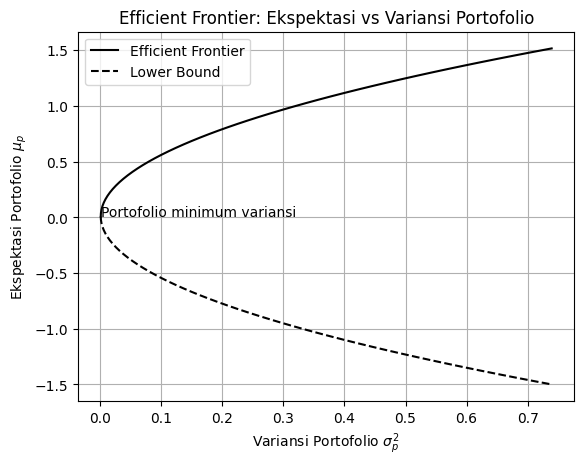

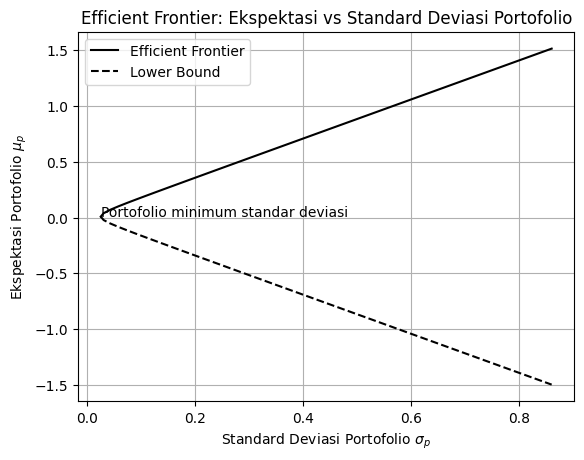

In [59]:
# Fungsi untuk memeriksa dan memperbaiki matriks kovariansi
def check_and_fix_covariance_matrix(C, tol=1e-6):
    # Memastikan matriks simetris
    if not np.allclose(C, C.T, atol=tol):
        raise ValueError("Error: Matriks kovariansi tidak simetris")

    # Jika eigenvalue negatif, tambahkan jitter pada diagonal
    eigenvalues = np.linalg.eigvals(C)
    if np.min(eigenvalues) < tol:
        jitter = tol - np.min(eigenvalues)
        C += np.eye(len(C)) * jitter
        print(f"Matriks kovariansi diperbaiki dengan jitter sebesar {jitter:.6f}")
    return C

# Fungsi untuk menghitung koefisien Efficient Frontier
def calculate_ef_coefficients(mu, C):
    # Konversi mu ke array NumPy dan ubah menjadi kolom vektor
    mu = mu.to_numpy().reshape(-1, 1)
    # Konversi C ke NumPy array (jika belum)
    C = C.to_numpy() if isinstance(C, pd.DataFrame) else C

    n = len(mu)
    e11 = np.ones((n, 1))  # Kolom vektor
    C_inv = np.linalg.inv(C)  # Invers matriks kovariansi

    # Perhitungan koefisien
    temp1 = C_inv @ e11
    temp2 = e11.T @ temp1
    h0 = (1 / temp2[0, 0]) * temp1
    temp3 = C_inv @ mu
    temp4 = e11.T @ temp3
    h1 = temp3 - temp4[0, 0] * h0

    # Hitung koefisien Efficient Frontier
    alpha0 = (mu.T @ h0)[0, 0]
    alpha1 = (mu.T @ h1)[0, 0]
    beta0 = (h0.T @ C @ h0)[0, 0]
    beta2 = (h1.T @ C @ h1)[0, 0]

    return alpha0, alpha1, beta0, beta2

# Fungsi untuk memplot Mean vs Variansi
def plot_ef_mv(t_bawah, t_atas, delta_t, alpha0, alpha1, beta0, beta2):
    t = np.arange(t_bawah, t_atas, delta_t)
    mup = alpha0 + t * alpha1
    mup_bawah = alpha0 - t * alpha1
    sigma2p = beta0 + t**2 * beta2

    plt.figure()
    plt.plot(sigma2p, mup, '-k', label='Efficient Frontier')
    plt.plot(sigma2p, mup_bawah, '--k', label='Lower Bound')
    plt.xlabel('Variansi Portofolio $\\sigma_p^2$')
    plt.ylabel('Ekspektasi Portofolio $\\mu_p$')
    plt.title('Efficient Frontier: Ekspektasi vs Variansi Portofolio', fontsize=12)
    plt.text(beta0, alpha0, 'Portofolio minimum variansi', fontsize=10)
    plt.legend()
    plt.grid()
    plt.show()

# Fungsi untuk memplot Mean vs Standard Deviasi
def plot_ef_ms(t_bawah, t_atas, delta_t, alpha0, alpha1, beta0, beta2):
    t = np.arange(t_bawah, t_atas, delta_t)
    mup = alpha0 + t * alpha1
    mup_bawah = alpha0 - t * alpha1
    stddevp = np.sqrt(beta0 + t**2 * beta2)

    plt.figure()
    plt.plot(stddevp, mup, '-k', label='Efficient Frontier')
    plt.plot(stddevp, mup_bawah, '--k', label='Lower Bound')
    plt.xlabel('Standard Deviasi Portofolio $\\sigma_p$')
    plt.ylabel('Ekspektasi Portofolio $\\mu_p$')
    plt.title('Efficient Frontier: Ekspektasi vs Standard Deviasi Portofolio', fontsize=12)
    plt.text(np.sqrt(beta0), alpha0, 'Portofolio minimum standar deviasi', fontsize=10)
    plt.legend()
    plt.grid()
    plt.show()

# Main script
cov_matrix = check_and_fix_covariance_matrix(covariance_matrix)  # Validasi & perbaikan matriks
alpha0, alpha1, beta0, beta2 = calculate_ef_coefficients(expected_returns, cov_matrix)
plot_ef_mv(0.0, 0.5, 0.01, alpha0, alpha1, beta0, beta2)
plot_ef_ms(0.0, 0.5, 0.01, alpha0, alpha1, beta0, beta2)

<ipython-input-60-c8ef90803601>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(std_devs[i], expected_returns[i], ticker.split('.')[0], fontsize=10, color='blue')


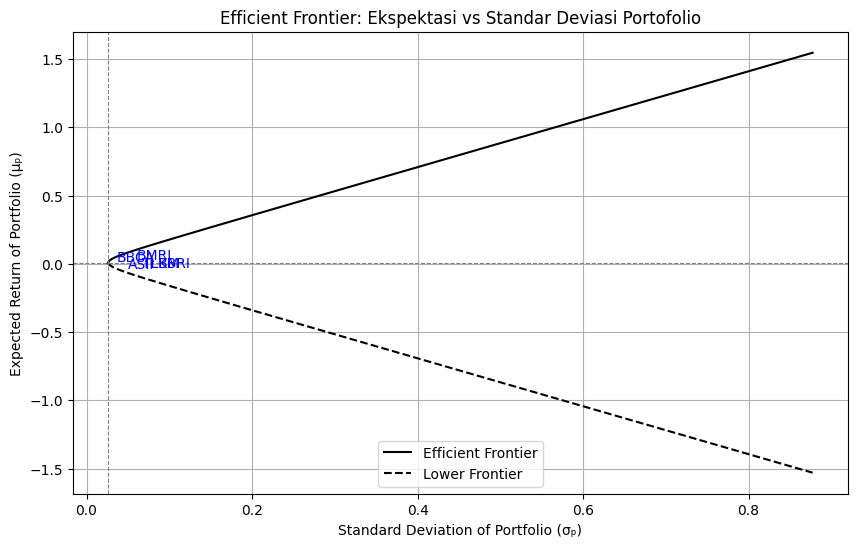

In [60]:
# Fungsi untuk menghitung koefisien Efficient Frontier
def calculate_ef_coefficients(mu, C):
    mu = mu.to_numpy().reshape(-1, 1)
    C = C.to_numpy() if isinstance(C, pd.DataFrame) else C
    n = len(mu)
    e11 = np.ones((n, 1))
    C_inv = np.linalg.inv(C)
    temp1 = C_inv @ e11
    temp2 = e11.T @ temp1
    h0 = (1 / temp2[0, 0]) * temp1
    temp3 = C_inv @ mu
    temp4 = e11.T @ temp3
    h1 = temp3 - temp4[0, 0] * h0
    alpha0 = (mu.T @ h0)[0, 0]
    alpha1 = (mu.T @ h1)[0, 0]
    beta0 = (h0.T @ C @ h0)[0, 0]
    beta2 = (h1.T @ C @ h1)[0, 0]
    return alpha0, alpha1, beta0, beta2

# Hitung koefisien Efficient Frontier
alpha0, alpha1, beta0, beta2 = calculate_ef_coefficients(expected_returns, covariance_matrix)

# Plot Efficient Frontier
t = np.linspace(0, 0.5, 100)
mu_p = alpha0 + t * alpha1
mu_p_bawah = alpha0 - t * alpha1
sigma_p = (beta0 + t**2 * beta2) ** 0.5

plt.figure(figsize=(10, 6))
plt.plot(sigma_p, mu_p, label='Efficient Frontier', color='k')
plt.plot(sigma_p, mu_p_bawah, linestyle='--', color='k', label='Lower Frontier')

# Tambahkan nama saham pada grafik
std_devs = np.sqrt(np.diag(covariance_matrix))  # Standar deviasi masing-masing saham
for i, ticker in enumerate(tickers):
    plt.text(std_devs[i], expected_returns[i], ticker.split('.')[0], fontsize=10, color='blue')

# Konfigurasi grafik
plt.xlabel('Standard Deviation of Portfolio (σₚ)')
plt.ylabel('Expected Return of Portfolio (μₚ)')
plt.title('Efficient Frontier: Ekspektasi vs Standar Deviasi Portofolio')
plt.axhline(y=alpha0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(x=np.sqrt(beta0), color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid()
plt.show()